# Membuat dan Mengaplikasikan Filter Moving Average


Filter Moving Average digunakan untuk mengurangi noise dalam gambar. Filter ini bekerja dengan mengambil rata-rata pixel di sekitar tiap pixel gambar.

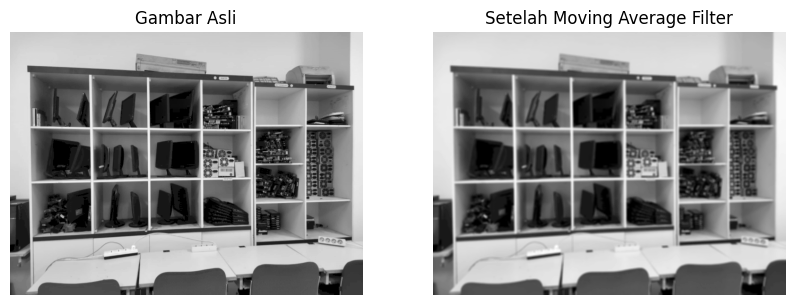

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat filter moving average (kernel 5x5)
kernel = np.ones((5, 5), np.float32) / 25

# Menerapkan filter menggunakan fungsi filter2D dari OpenCV
filtered_image = cv2.filter2D(image, -1, kernel)

# Menampilkan gambar asli dan hasil filter
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Gambar setelah moving average filter
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Setelah Moving Average Filter')
plt.axis('off')

plt.show()


Analisis Hasil:

Gambar yang sudah diterapkan filter moving average akan lebih halus dan mengurangi noise. Namun, detail gambar juga bisa sedikit hilang karena rata-rata pixel di sekitar area tersebut.

# Deteksi Fitur dengan SIFT

SIFT (Scale-Invariant Feature Transform) digunakan untuk mendeteksi dan menggambarkan fitur-fitur penting dalam gambar, yang dapat dikenali meskipun terjadi perubahan skala, rotasi, atau pencahayaan.

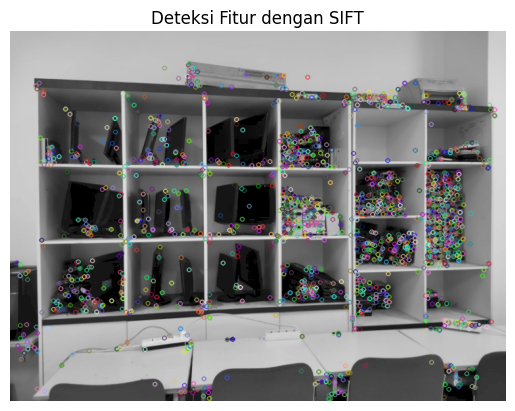

In [ ]:
# Membaca gambar
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Menginisialisasi detektor SIFT
sift = cv2.SIFT_create()

# Mendeteksi keypoints dan descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Menggambar keypoints pada gambar
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Menampilkan gambar dengan keypoints
plt.imshow(image_with_keypoints)
plt.title('Deteksi Fitur dengan SIFT')
plt.axis('off')
plt.show()


Analisis Hasil:

Titik-titik yang ditunjukkan oleh keypoints adalah lokasi fitur penting dalam gambar. Fitur ini tahan terhadap perubahan ukuran dan rotasi, serta berguna dalam aplikasi seperti pencocokan gambar dan pelacakan objek.

# Representasi Histogram Gambar

Histogram gambar menggambarkan distribusi intensitas pixel dalam gambar. Ini berguna untuk menganalisis kontras dan pencahayaan gambar.

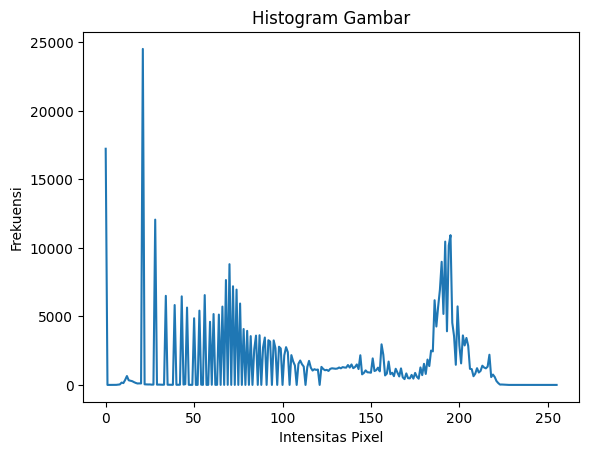

In [ ]:
# Menghitung histogram gambar
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Menampilkan histogram
plt.plot(histogram)
plt.title('Histogram Gambar')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Frekuensi')
plt.show()


Analisis Hasil:

Histogram menunjukkan sebaran intensitas pixel. Jika gambar gelap, histogram akan lebih terkonsentrasi di sisi kiri, sementara gambar terang lebih condong ke kanan. Histogram juga memberikan informasi tentang kontras gambar.

# Gaussian Smoothing

Gaussian Smoothing digunakan untuk menghaluskan gambar dengan cara memberikan bobot lebih pada pixel yang lebih dekat dengan pusat. Ini mengurangi noise secara lebih efektif dibandingkan filter rata-rata.

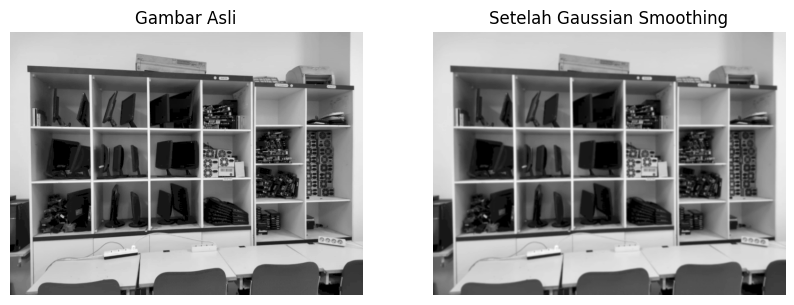

In [ ]:
# Menerapkan Gaussian Smoothing
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

# Menampilkan gambar asli dan hasil Gaussian Smoothing
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Gambar setelah Gaussian Smoothing
plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Setelah Gaussian Smoothing')
plt.axis('off')

plt.show()


Analisis Hasil:

Gambar yang telah diproses dengan Gaussian Smoothing akan lebih halus dan lebih sedikit noise, namun dapat mengurangi ketajaman gambar. Perbedaan antara gambar asli dan yang dihaluskan akan lebih terlihat pada detail kecil.

# Deteksi Tepi dengan Sobel Filter

Sobel Filter digunakan untuk mendeteksi tepi-tepi dalam gambar dengan cara mengukur perubahan intensitas antara pixel yang berdekatan.

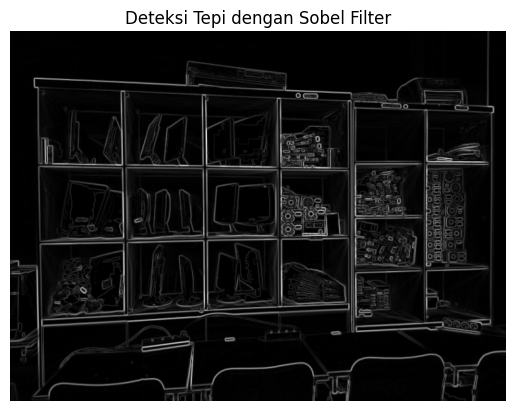

In [ ]:
# Menghitung tepi horizontal dan vertikal menggunakan Sobel filter
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Menghitung magnitude dari gradien (hasil gabungan Sobel X dan Y)
edges = cv2.magnitude(sobel_x, sobel_y)

# Menampilkan gambar tepi
plt.imshow(edges, cmap='gray')
plt.title('Deteksi Tepi dengan Sobel Filter')
plt.axis('off')
plt.show()


Analisis Hasil:

Hasil Sobel Filter menunjukkan tepi gambar. Area dengan perubahan intensitas yang besar akan muncul lebih terang, menunjukkan adanya tepi objek atau batas antar area.

# Representasi Fitur dengan Histogram of Oriented Gradients (HOG)

HOG adalah teknik ekstraksi fitur yang digunakan dalam deteksi objek, terutama dalam pengenalan bentuk dan objek dalam citra.

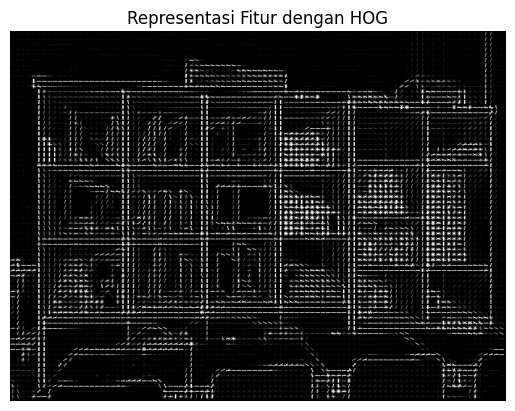

In [ ]:
from skimage.feature import hog
from skimage import exposure

# Menghitung HOG (Histogram of Oriented Gradients)
fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Meningkatkan kontras gambar HOG
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Menampilkan gambar HOG
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('Representasi Fitur dengan HOG')
plt.axis('off')
plt.show()


Analisis Hasil:

Gambar hasil HOG menunjukkan fitur berbasis gradien yang digunakan untuk mengenali pola atau objek dalam gambar. Gambar ini dapat digunakan untuk tugas pengenalan objek atau klasifikasi citra.